In [1]:
from google_play_scraper import app, Sort, reviews_all
from app_store_scraper import AppStore
import pandas as pd
import numpy as np
import json, os, uuid

In [2]:
g_reviews = reviews_all(
        "com.jetstartgames.chess",
        sleep_milliseconds=0, 
        lang='en', 
        country='us',
        sort=Sort.NEWEST, 
    )

In [3]:
g_df = pd.DataFrame(np.array(g_reviews),columns=['review'])
g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))

g_df2.drop(columns={'userImage', 'reviewCreatedVersion'},inplace = True)
g_df2.rename(columns= {'score': 'rating','userName': 'user_name', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date', 'replyContent': 'developer_response', 'repliedAt': 'developer_response_date', 'thumbsUpCount': 'thumbs_up'},inplace = True)
g_df2.insert(loc=0, column='source', value='Google Play')
g_df2.insert(loc=3, column='review_title', value=None)
g_df2['laguage_code'] = 'en'
g_df2['country_code'] = 'us'
g_df2

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,Google Play,c1c625e0-360b-4c84-8215-14b5c943f32c,A Google user,None,Good game fo concentration,5,0,2026-01-27 11:16:50,None,NaT,2.8.9,en,us
1,Google Play,68cbe0ce-fa3f-48f8-aee2-d07478402662,A Google user,None,best,5,0,2026-01-27 10:34:51,None,NaT,2.8.9,en,us
2,Google Play,0c3c6682-7d11-4b4a-94a6-0b0bdcb79863,A Google user,None,very good game,5,0,2026-01-27 08:30:44,None,NaT,None,en,us
3,Google Play,25347f3c-4a76-4840-810f-1c72dc6d8d91,A Google user,None,Best app,5,0,2026-01-27 08:21:09,None,NaT,None,en,us
4,Google Play,94885bb0-aa5d-4652-9202-12231431e2ec,A Google user,None,mindset game 🎮 very nice 🙂,5,0,2026-01-27 07:01:49,None,NaT,2.8.9,en,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245752,Google Play,aa6dd5c1-ee38-4f67-8442-44ed3d6662c4,A Google user,None,Good one,5,4,2015-09-09 11:15:55,None,NaT,None,en,us
245753,Google Play,7aba6853-4c6e-4624-a2ba-f3f5cd0fc1f2,A Google user,None,waste of time,1,2,2015-09-03 04:54:00,None,NaT,3.2,en,us
245754,Google Play,6c5882e9-6f75-45ea-a1ee-d01358ebb0c4,A Google user,None,انلمت,5,6,2015-08-25 10:45:36,None,NaT,3.2,en,us
245755,Google Play,3c9de7fe-3d6c-498d-9d8b-43acd1d4d2dd,A Google user,None,i was in chess team n school n king can kill k...,2,2,2015-08-20 08:55:02,None,NaT,3.2,en,us


In [4]:
g_df2['review_description'].str.len().describe()

count    245727.000000
mean         28.578662
std          48.452674
min           1.000000
25%           7.000000
50%          13.000000
75%          30.000000
max        1492.000000
Name: review_description, dtype: float64

In [5]:
g_df2['review_description'].sample(20, random_state=42)

95437                                      unbelivebel game
36964                                   I've nothing to say
191398                                        Stimulating 😄
60408                                          This is good
134313                                            I hate it
159902                                                goood
100412                                                 Nice
219673                  Only  for the people who have brain
139281                                                Super
174395                                game is too much good
245410    love it. play five hours a day. why does exper...
174781                                            excellent
244986    Easy to beat until Master level, which always ...
117097                                      world besr game
100882                                              Wow😲😲😲😲
133087                                             Gus game
186140                                  

In [6]:
g_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245757 entries, 0 to 245756
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   source                   245757 non-null  object        
 1   review_id                245757 non-null  object        
 2   user_name                245757 non-null  object        
 3   review_title             0 non-null       object        
 4   review_description       245727 non-null  object        
 5   rating                   245757 non-null  int64         
 6   thumbs_up                245757 non-null  int64         
 7   review_date              245757 non-null  datetime64[ns]
 8   developer_response       318 non-null     object        
 9   developer_response_date  318 non-null     datetime64[ns]
 10  appVersion               163201 non-null  object        
 11  laguage_code             245757 non-null  object        
 12  country_code    

In [7]:
g_df2['rating'].value_counts(normalize=True).sort_index()

0    0.000008
1    0.082708
2    0.020113
3    0.056755
4    0.137445
5    0.702971
Name: rating, dtype: float64

In [8]:
g_df2['text_len'] = g_df2['review_description'].str.len()

In [9]:
g_df2.groupby('rating')['text_len'].mean()

rating
0    15.000000
1    42.119311
2    45.436577
3    32.351284
4    31.077868
5    25.709898
Name: text_len, dtype: float64

In [10]:
from matplotlib import pyplot as plt

In [11]:
rating_counts = g_df2["rating"].value_counts().sort_index()

Text(0.5, 1.0, 'Distribution of Ratings')

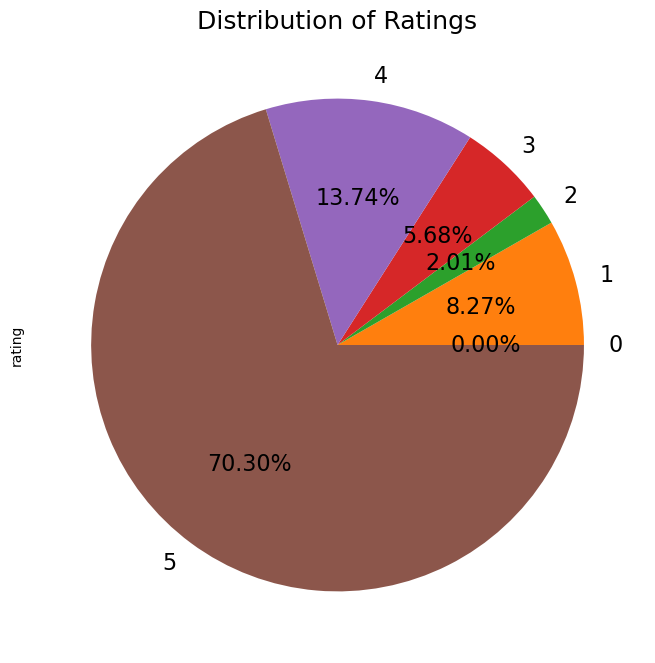

In [12]:
rating_counts.plot(
    kind="pie",
    autopct="%.2f%%",
    fontsize=16,
    figsize=(10, 8)
)

plt.title("Distribution of Ratings", fontsize=18)

In [13]:
g_df2["review_description"] = g_df2["review_description"].fillna("").astype(str)

In [14]:
g_df2["text_len"] = g_df2["review_description"].str.len()

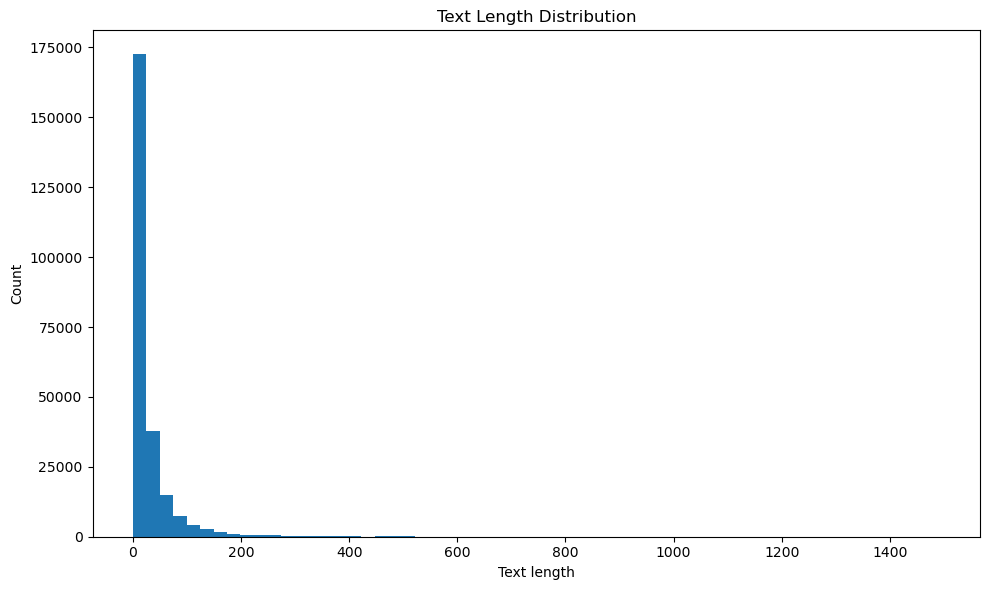

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(g_df2["text_len"], bins=60)
plt.title("Text Length Distribution")
plt.xlabel("Text length")
plt.ylabel("Count")
plt.tight_layout()

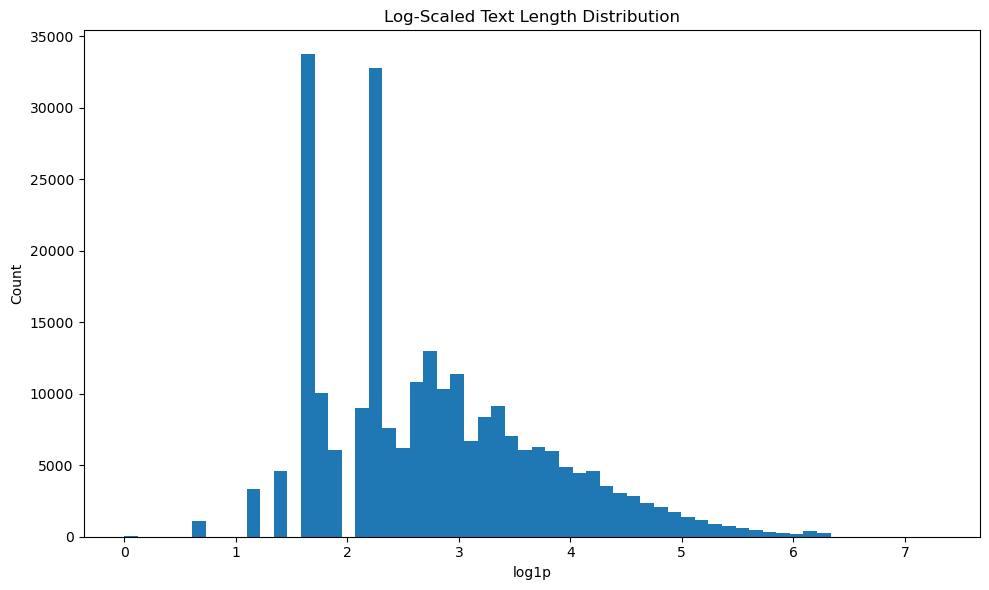

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(np.log1p(g_df2["text_len"]), bins=60)
plt.title("Log-Scaled Text Length Distribution")
plt.xlabel("log1p")
plt.ylabel("Count")
plt.tight_layout()

In [17]:
ratings_sorted = sorted(g_df2["rating"].unique())
data_by_rating = [g_df2.loc[g_df2["rating"] == r, "text_len"].values for r in ratings_sorted]

Text(0, 0.5, 'Text length')

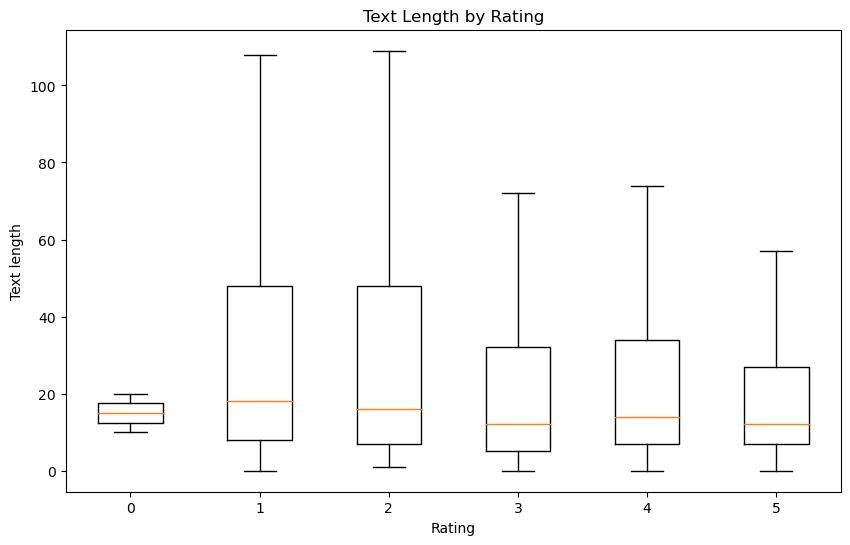

In [18]:
plt.figure(figsize=(10, 6))
plt.boxplot(data_by_rating, labels=ratings_sorted, showfliers=False) 
plt.title("Text Length by Rating")
plt.xlabel("Rating")
plt.ylabel("Text length")

In [19]:
mean_len = g_df2.groupby("rating")["text_len"].mean().reindex(ratings_sorted)

Text(0, 0.5, 'Avg text length')

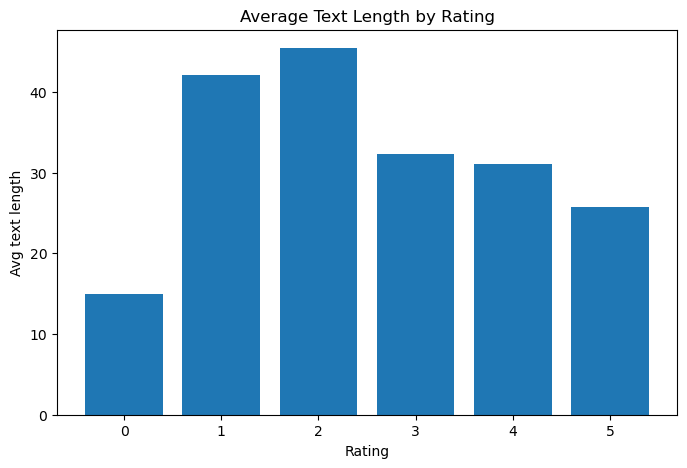

In [20]:
plt.figure(figsize=(8, 5))
plt.bar(mean_len.index.astype(str), mean_len.values)
plt.title("Average Text Length by Rating")
plt.xlabel("Rating")
plt.ylabel("Avg text length")

In [21]:
missing_pct = g_df2.isna().mean().sort_values(ascending=False) * 100
missing_table = pd.DataFrame({
    "missing_pct": missing_pct.round(2),
    "missing_count": g_df2.isna().sum(),
    "dtype": g_df2.dtypes.astype(str)
}).sort_values("missing_pct", ascending=False)

In [22]:
display(missing_table.head(30))

,missing_pct,missing_count,dtype
review_title,100.00,245757,object
developer_response,99.87,245439,object
developer_response_date,99.87,245439,datetime64[ns]
appVersion,33.59,82556,object
country_code,0.00,0,object
laguage_code,0.00,0,object
rating,0.00,0,int64
review_date,0.00,0,datetime64[ns]
review_description,0.00,0,object
review_id,0.00,0,object


In [23]:
dup_pct = g_df2.duplicated().mean() * 100
print(f"Duplicate rows %: {dup_pct:.2f}%")

Duplicate rows %: 0.00%
